In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pprint
import json
import matplotlib.pyplot as plt

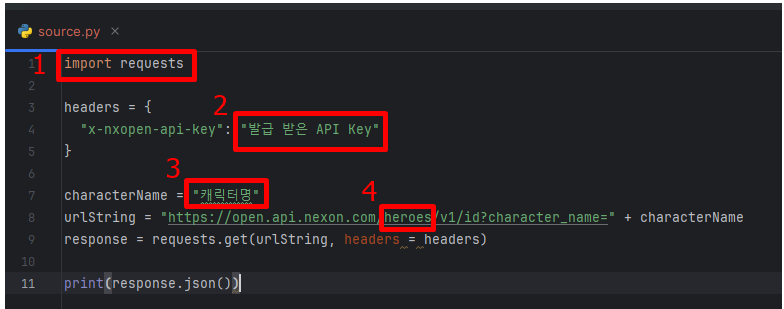

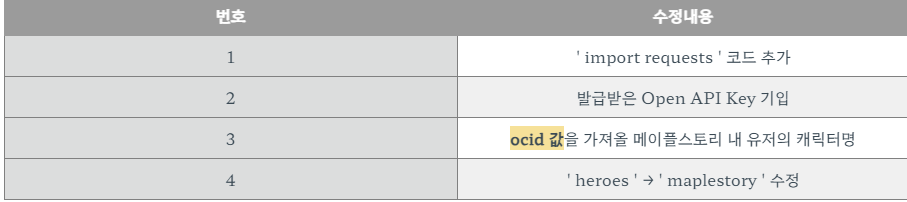

# 캐릭터 기본 정보 조회

In [4]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  
characterName = "난싸개다"
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
  
print(response.json())

{'ocid': '9fa6b90baf51e7bc8050e7ba137a56f9'}


In [5]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

characterName = input('캐릭터 이름')
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
    
ocid = response.json()['ocid']
      
urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid="+ ocid +"&2024-07-21"
response = requests.get(urlString, headers = headers)
    
print(response.json())

캐릭터 이름 성공한근아


{'date': None, 'character_name': '성공한근아', 'world_name': '버닝', 'character_gender': '남', 'character_class': '보우마스터', 'character_class_level': '6', 'character_level': 260, 'character_exp': 1024739003268, 'character_exp_rate': '59.168', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/HPEDKCKNJCOOAFDEOGCHLCINNMKCCAMOOFCHCNIENEAOJICAPJMGHKBBIGFHJJLGINMDGACHHDEBOMIBIMBABICDOBLDCHCPMKJFCFNCGFFGKHINIFBDJDEKKIBIIICODABHIBBMHLLMMDMOPLELHMJHKCOJFDNBNBMCPMANAMLADIFALKKKMOKKBEHHHKMDMNICHGDGHIBLNLBBNJPBCDMEFBHOCEPHLICHFKOHAFOOPGBNNINDMGONDJLLIAHM.png', 'character_date_create': '2024-06-22T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}


In [6]:
import requests
import json
import pandas as pd

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []
data = []

# 여러 캐릭터 이름을 한 번에 입력받아 처리
character_names_input = input('캐릭터 이름들을 공백으로 구분하여 입력하세요: ')
characterNames = character_names_input.split()

for character_name in characterNames:
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name +"&2024-07-22"
    response = requests.get(urlString, headers=headers)
    
    if response.status_code == 200:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=" + ocid
        response = requests.get(urlString, headers=headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")
        urlStrings.append(None)
        responses.append(None)

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(len(characterNames)):
    if responses[i] is not None and responses[i].status_code == 200:
        print(f"캐릭터 이름: {characterNames[i]}")
        print(f"URL: {urlStrings[i]}")
        print(f"Response: {responses[i].json()}")
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"{characterNames[i]}의 데이터를 가져오는 중 오류 발생")

# 데이터프레임으로 결합
if data:
    chdata = pd.concat(data, ignore_index=True)
    print(chdata)
else:
    print("표시할 데이터가 없습니다.")


캐릭터 이름들을 공백으로 구분하여 입력하세요:  성공한연택 성공한근아 난싸개다


캐릭터 이름: 성공한연택
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=4ba709833ae91431a33218ed535006b0
Response: {'date': None, 'character_name': '성공한연택', 'world_name': '버닝', 'character_gender': '여', 'character_class': '비숍', 'character_class_level': '5', 'character_level': 251, 'character_exp': 241029424131, 'character_exp_rate': '52.889', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/IBOLLAOFIHFHACEDMCGIHOFPNNPAPBLFIEGPBNPPPMIHCPIIECHBDFNOIFGEEDHLACEFLDILOGPGBLPEHCCCCCCPJPHJJDIKCALCDDCCDMLFBCNPJEDPCCLKICKJPAMEJIFAPBGECOFHFPGLLDLKOCLKGECCFOOEJOHKGDOONFLHLJNEOKKEKNBEEPCLPMGAFPLHFGDGHAJMOIECKLFLBJNOJKJHDKLPBEJHDPKJMNANOKBMFOIAMGPOBNGFOLJE.png', 'character_date_create': '2024-06-27T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}
캐릭터 이름: 성공한근아
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=d5b955956d728a4b63db9b6a3017a04a
Response: {'date': None, 'character_name': '성공한근아',

# 여러개의 계정을 불러올때 사용하는 프로그램

In [7]:
import requests
import json
import pandas as pd
import time

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

def get_response_with_retry(url, headers, max_retries=5, delay=2):
    for attempt in range(max_retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response
        elif response.status_code == 429:
            print(f"429 오류 발생. {delay}초 후에 재시도합니다...")
            time.sleep(delay)
            delay *= 2  # 지연 시간을 기하급수적으로 증가시킴
        else:
            response.raise_for_status()  # 다른 오류는 예외 발생
    return None

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []
data = []

# 여러 캐릭터 이름을 한 번에 입력받아 처리
character_names_input = input('캐릭터 이름들을 공백으로 구분하여 입력하세요: ')
characterNames = character_names_input.split()

for character_name in characterNames:
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name+"&2024-07-22"
    response = get_response_with_retry(urlString, headers)
    
    if response:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/basic?ocid=" + ocid
        response = get_response_with_retry(urlString, headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"{character_name}의 OCID를 가져오는 중 오류 발생")
        urlStrings.append(None)
        responses.append(None)

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(len(characterNames)):
    if responses[i] is not None:
        print(f"캐릭터 이름: {characterNames[i]}")
        print(f"URL: {urlStrings[i]}")
        print(f"Response: {responses[i].json()}")
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"{characterNames[i]}의 데이터를 가져오는 중 오류 발생")

# 데이터프레임으로 결합
if data:
    chdata = pd.concat(data, ignore_index=True)
    print(chdata)
else:
    print("표시할 데이터가 없습니다.")


캐릭터 이름들을 공백으로 구분하여 입력하세요:  성공한근아 성공한연택 난싸개다


캐릭터 이름: 성공한근아
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=d5b955956d728a4b63db9b6a3017a04a
Response: {'date': None, 'character_name': '성공한근아', 'world_name': '버닝', 'character_gender': '남', 'character_class': '보우마스터', 'character_class_level': '6', 'character_level': 260, 'character_exp': 1024739003268, 'character_exp_rate': '59.168', 'character_guild_name': None, 'character_image': 'https://open.api.nexon.com/static/maplestory/Character/HPEDKCKNJCOOAFDEOGCHLCINNMKCCAMOOFCHCNIENEAOJICAPJMGHKBBIGFHJJLGINMDGACHHDEBOMIBIMBABICDOBLDCHCPMKJFCFNCGFFGKHINIFBDJDEKKIBIIICODABHIBBMHLLMMDMOPLELHMJHKCOJFDNBNBMCPMANAMLADIFALKKKMOKKBEHHHKMDMNICHGDGHIBLNLBBNJPBCDMEFBHOCEPHLICHFKOHAFOOPGBNNINDMGONDJLLIAHM.png', 'character_date_create': '2024-06-22T00:00+09:00', 'access_flag': 'true', 'liberation_quest_clear_flag': 'false'}
캐릭터 이름: 성공한연택
URL: https://open.api.nexon.com/maplestory/v1/character/basic?ocid=4ba709833ae91431a33218ed535006b0
Response: {'date': None, 'character_name': '성공한

In [8]:
import requests
import pandas as pd
from datetime import datetime, timedelta

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# Character name and start date input
character_name = input('캐릭터 이름을 입력하세요: ')
start_date_input = input('시작 날짜를 입력하세요 (형식: YYYY-MM-DD): ')

# Convert start date to datetime object
start_date = datetime.strptime(start_date_input, "%Y-%m-%d")

# Calculate the end date (current date - 1)
end_date = datetime.now() - timedelta(days=1)

# Generate list of dates from start_date to end_date
date_list = [(start_date + timedelta(days=x)).strftime("%Y-%m-%d") for x in range((end_date - start_date).days + 1)]

# Get OCID for the character
urlString = f"https://open.api.nexon.com/maplestory/v1/id?character_name={character_name}"
response = requests.get(urlString, headers=headers)

if response.status_code == 200:
    ocid = response.json()['ocid']
    
    data = []
    
    for date in date_list:
        urlString = f"https://open.api.nexon.com/maplestory/v1/character/basic?ocid={ocid}&date={date}"
        response = requests.get(urlString, headers=headers)
        
        if response.status_code == 200:
            print(f"날짜: {date}")
            print(f"URL: {urlString}")
            print(f"Response: {response.json()}")
            data.append(pd.json_normalize(response.json()))
        else:
            print(f"{date}의 데이터를 가져오는 중 오류 발생: {response.status_code}")
    
    # Combine data into a DataFrame
    if data:
        chdata = pd.concat(data, ignore_index=True)
        print(chdata)
    else:
        print("표시할 데이터가 없습니다.")
else:
    print(f"{character_name}의 OCID를 가져오는 중 오류 발생: {response.status_code}")


캐릭터 이름을 입력하세요:  성공한연택
시작 날짜를 입력하세요 (형식: YYYY-MM-DD):  


ValueError: time data '' does not match format '%Y-%m-%d'

In [9]:
chdata

,date,character_name,world_name,character_gender,character_class,character_class_level,character_level,character_exp,character_exp_rate,character_guild_name,character_image,character_date_create,access_flag,liberation_quest_clear_flag
0,None,성공한근아,버닝,남,보우마스터,6,260,1024739003268,59.168,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-22T00:00+09:00,true,false
1,None,성공한연택,버닝,여,비숍,5,251,241029424131,52.889,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-27T00:00+09:00,true,false
2,None,난싸개다,버닝,여,메카닉,6,260,804895468414,46.474,None,https://open.api.nexon.com/static/maplestory/C...,2024-06-25T00:00+09:00,true,false


In [10]:
a=chdata+chdata1

NameError: name 'chdata1' is not defined

In [11]:
a.plot('date',['character_level'],kind='bar')



NameError: name 'a' is not defined

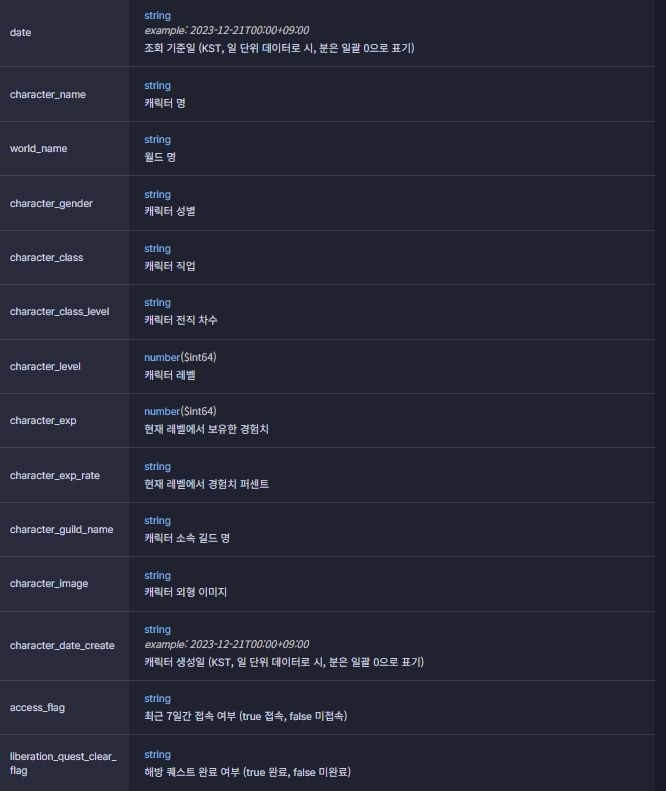

# 캐릭터 종합 능력치 정보 조회

In [12]:
import requests
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

characterName = input('캐릭터 이름')
urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + characterName
response = requests.get(urlString, headers = headers)
    
ocid = response.json()['ocid']
      
urlString = "https://open.api.nexon.com/maplestory/v1/character/stat?ocid="+ ocid +"&2024-07-22"
response = requests.get(urlString, headers = headers)
    
print(response.json())

캐릭터 이름 성공한근아


{'date': None, 'character_class': '보우마스터', 'final_stat': [{'stat_name': '최소 스탯공격력', 'stat_value': '4887001'}, {'stat_name': '최대 스탯공격력', 'stat_value': '5749412'}, {'stat_name': '데미지', 'stat_value': '50.00'}, {'stat_name': '보스 몬스터 데미지', 'stat_value': '235.00'}, {'stat_name': '최종 데미지', 'stat_value': '37.80'}, {'stat_name': '방어율 무시', 'stat_value': '92.25'}, {'stat_name': '크리티컬 확률', 'stat_value': '89'}, {'stat_name': '크리티컬 데미지', 'stat_value': '56.00'}, {'stat_name': '상태이상 내성', 'stat_value': '24'}, {'stat_name': '스탠스', 'stat_value': '100'}, {'stat_name': '방어력', 'stat_value': '19743'}, {'stat_name': '이동속도', 'stat_value': '160'}, {'stat_name': '점프력', 'stat_value': '123'}, {'stat_name': '스타포스', 'stat_value': '227'}, {'stat_name': '아케인포스', 'stat_value': '930'}, {'stat_name': '어센틱포스', 'stat_value': '50'}, {'stat_name': 'STR', 'stat_value': '2849'}, {'stat_name': 'DEX', 'stat_value': '24857'}, {'stat_name': 'INT', 'stat_value': '1280'}, {'stat_name': 'LUK', 'stat_value': '1199'}, {'stat_name': 'HP

In [13]:
import requests
import json
import pandas as pd

headers = {
    "x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}

# 리스트를 사용하여 변수 초기화
characterNames = []
urlStrings = []
responses = []

for i in range(4):
    character_name = input('캐릭터 이름: ')
    characterNames.append(character_name)
    urlString = "https://open.api.nexon.com/maplestory/v1/id?character_name=" + character_name+"&date=2024-07-22"
    response = requests.get(urlString, headers=headers)
    
    if response.status_code == 200:
        ocid = response.json()['ocid']
        urlString = "https://open.api.nexon.com/maplestory/v1/character/stat?ocid=" + ocid
        response = requests.get(urlString, headers=headers)
        urlStrings.append(urlString)
        responses.append(response)
    else:
        print(f"Error fetching OCID for {character_name}: {response.status_code}")
        urlStrings.append(None)
        responses.append(None)

# 데이터를 저장할 리스트 초기화
data = []

# 각 리스트의 내용을 출력하고 데이터프레임에 추가
for i in range(4):
    if responses[i] is not None and responses[i].status_code == 200:
        
        data.append(pd.json_normalize(responses[i].json()))
    else:
        print(f"Error fetching data for {characterNames[i]}")

# 데이터프레임으로 결합
if data:
    statdata = pd.concat(data, ignore_index=True)
    print(statdata)
else:
    print("No data to display.")


캐릭터 이름:  난싸개다
캐릭터 이름:  성공한근아
캐릭터 이름:  성공한연택
캐릭터 이름:  


Error fetching OCID for : 400
Error fetching data for 
   date character_class                                         final_stat  \
0  None             메카닉  [{'stat_name': '최소 스탯공격력', 'stat_value': '4647...   
1  None           보우마스터  [{'stat_name': '최소 스탯공격력', 'stat_value': '4887...   
2  None              비숍  [{'stat_name': '최소 스탯공격력', 'stat_value': '3566...   

   remain_ap  
0          0  
1          0  
2          0  


In [14]:
statdata["final_stat"]

0    [{'stat_name': '최소 스탯공격력', 'stat_value': '4647...
1    [{'stat_name': '최소 스탯공격력', 'stat_value': '4887...
2    [{'stat_name': '최소 스탯공격력', 'stat_value': '3566...
Name: final_stat, dtype: object

# 스타포스 강화 결과 조회

In [15]:
headers = {
"x-nxopen-api-key": "test_8a6a2f7dba839fcd61e60435f5bcc3f30ce40fe56c9d2eb3a0f6c143d68b79b0efe8d04e6d233bd35cf2fabdeb93fb0d"
}
  

urlString = 'https://open.api.nexon.com/maplestory/v1/history/starforce?count=500&date=2020-12-27&cursor=%3F'
response = requests.get(urlString, headers = headers)
  
print(response.json())

{'error': {'name': 'OPENAPI00003', 'message': 'Please input valid id'}}


In [56]:
from bs4 import BeautifulSoup
import requests


# 홈페이지 주소 가져오기
url = "https://maplestory.nexon.com/N23Ranking/World/Total?w=15"

html = requests.get(url)
bs_html = BeautifulSoup(html.content, "html.parser")

value = soup.find("span", {"class": "char_img"})
print(value)

sys.stdout = open('Save_Crawling.txt', 'w', encoding='UTF-8')

print(value) # 웹 페이지 txt 파일로 출력

In [15]:
import requests
from bs4 import BeautifulSoup
import sys
# 1) reqeusts 라이브러리를 활용한 HTML 페이지 요청 
# 1-1) res 객체에 HTML 데이터가 저장되고, res.content로 데이터를 추출할 수 있음
res = requests.get('https://maplestory.nexon.com/N23Ranking/World/Total?w=15')

print(res.content)
# 2) HTML 페이지 파싱 BeautifulSoup(HTML데이터, 파싱방법)
# BeautifulSoup 파싱방법
soup = BeautifulSoup(res.content, 'html.parser')

# 3) 필요한 데이터 검색

title = (soup.find("tr", "class"))
    
sys.stdout = open('Save_Crawling.txt', 'w', encoding='UTF-8')

# 4) 필요한 데이터 추출
print(title.get_text())

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
import requests
from bs4 import BeautifulSoup
import sys

# 1) requests 라이브러리를 활용한 HTML 페이지 요청
res = requests.get('https://maplestory.nexon.com/N23Ranking/World/Total?w=15')

# 2) HTML 페이지 파싱
soup = BeautifulSoup(res.content, 'html.parser')

# 3) 필요한 데이터 검색
title = soup.find("tr", class_="rank01")

# 4) 필요한 데이터 추출 및 파일에 저장
sys.stdout = open('Save_Crawling.txt', 'w', encoding='UTF-8')
if title:
    print(title.get_text(strip=True))
else:
    print("데이터를 찾을 수 없습니다.")
sys.stdout.close()


In [ ]:
import requests
from bs4 import BeautifulSoup

# 1) requests 라이브러리를 활용한 HTML 페이지 요청
res = requests.get('https://maplestory.nexon.com/N23Ranking/World/Total?w=15')

# 2) HTML 페이지 파싱
soup = BeautifulSoup(res.content, 'html.parser')

# 3) 필요한 데이터 검색
rank_row = soup.find("tr", class_="rank01")

# 4) 필요한 데이터 추출 및 파일에 저장
if rank_row:
    # "흰여울의은월" 텍스트가 포함된 열 찾기
    columns = rank_row.find_all("td")
    # 예를 들어, 2번째 열에 텍스트가 있다고 가정
    character_name = columns[1].get_text(strip=True) if len(columns) > 1 else "데이터를 찾을 수 없습니다."
else:
    character_name = "데이터를 찾을 수 없습니다."

with open('Save_Crawling.txt', 'w', encoding='UTF-8') as file:
    file.write(character_name)


In [ ]:
import requests
from bs4 import BeautifulSoup

def get_character_names_from_page(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    rank_rows = soup.find_all("tr")
    character_names = []

    for row in rank_rows:
        columns = row.find_all("td")
        if len(columns) > 1:
            character_name = columns[1].get_text(strip=True)
            character_names.append(character_name)
    
    return character_names

# 두 페이지의 URL
urls = [
    'https://maplestory.nexon.com/N23Ranking/World/Total?w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=2&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=3&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=4&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=5&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=6&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=7&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=8&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=9&w=15',
    'https://maplestory.nexon.com/N23Ranking/World/Total?page=10&w=15'
    
    
    
]

all_character_names = []
for url in urls:
    all_character_names.extend(get_character_names_from_page(url))

# 상위 50개만 선택
top_50_character_names = all_character_names[:50]

# 파일에 저장
with open('Save_Crawling.txt', 'w', encoding='UTF-8') as file:
    for name in top_50_character_names:
        file.write(name + '\n')

print("저장이 완료되었습니다.")
